In [1]:
using LinearAlgebra, PyPlot

# Real matrices and complex λ

A *real* matrix can easily have *complex* eigenvalues, because (as you know from the quadratic formula), real polynomials such as $\det(A - \lambda I)$ can have complex roots.

Here is a randomly chosen $5 \times 5$ real matrix, for example:

In [2]:
A = [   0  -9   5  -4   7
       -2   2   0  -5  -9
        4   9   7   5   2
        5   0  -7   5  -4
        2   1  -3  -8   0   ]

5×5 Matrix{Int64}:
  0  -9   5  -4   7
 -2   2   0  -5  -9
  4   9   7   5   2
  5   0  -7   5  -4
  2   1  -3  -8   0

In [3]:
λ = eigvals(A)

5-element Vector{ComplexF64}:
 -5.616265073910875 - 8.089914555646233im
 -5.616265073910875 + 8.089914555646233im
  7.593939120984211 + 0.0im
  8.819295513418766 - 4.439554583783142im
  8.819295513418766 + 4.439554583783142im

In [4]:
# a little function to plot the complex axes nicely
function reim_axes(ax)
    ax.axis("equal")

    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines["left"].set_position("center")
    ax.spines["bottom"].set_position("center")

    # Eliminate upper and right axes
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position("bottom")
    ax.yaxis.set_ticks_position("left")

    xlabel(L"\operatorname{Re} \lambda")
    ax.xaxis.set_label_coords(1.04, 0.52)

    ylabel(L"\operatorname{Im} \lambda", rotation=0)
    ax.yaxis.set_label_coords(0.5, 1.02)
end

reim_axes (generic function with 1 method)

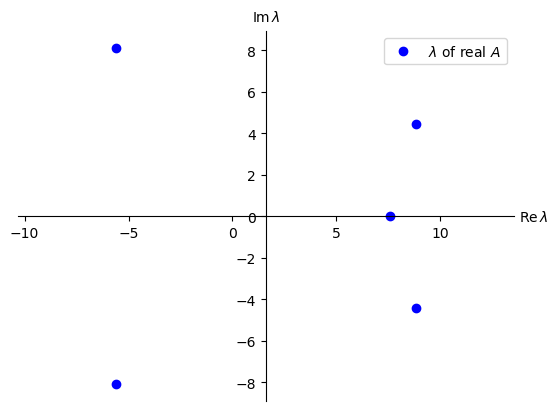

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /Users/stevenj/.julia/packages/PyCall/L0fLP/src/numpy.jl:67


PyObject <matplotlib.legend.Legend object at 0x15f21df70>

In [5]:
plot(real.(λ), imag.(λ), "bo", label=L"$\lambda$ of real $A$")

reim_axes(gca())
legend()

The **complex eigenvalues** of a real matrix come in **complex-conjugate pairs**:

The **eigenvectors** also come in conjugate pairs:

In [6]:
X = eigvecs(A)
X[:,1:2] # the first two eigenvectors, corresponding to λ ≈ -5.6 ± 8.1i

5×2 Matrix{ComplexF64}:
  0.111042-0.466655im   0.111042+0.466655im
  0.486281-0.0im        0.486281+0.0im
 -0.363772+0.179752im  -0.363772-0.179752im
  0.115521+0.375451im   0.115521-0.375451im
  0.322662+0.332225im   0.322662-0.332225im

This fact is easy to derive.   If $A$ is a real matrix (so $\bar{A}=A$) and we have an eigensolution, we can just take the complex-conjugate of both sides:

$$
Ax = \lambda x \implies \overline{Ax} = \boxed{A \bar{x}} = \overline{\lambda x} = \boxed{\bar{\lambda} \bar{x}}
$$

so the **complex-conjugate of any eigensolution is also an eigensolution** for any **real matrix**.

# Complex matrices and complex λ

Of course, complex matrices will have complex λ as well, but they have **no particular symmetry** in general.

For example, here is a randomly chosen $5\times 5$ complex matrix $B$:

In [7]:
B = [ -4+6im   4+3im   2+5im   6+9im   0+0im
      -3+4im   4+3im  -6-3im   5+0im   9+5im
       8+3im  -3-6im   6-3im  -9-5im   4+8im
       9+9im   9+0im   2-1im   5+2im   7+9im
      -4-9im   0+0im   6+4im  -2-6im  -4-5im ]

5×5 Matrix{Complex{Int64}}:
 -4+6im   4+3im   2+5im   6+9im   0+0im
 -3+4im   4+3im  -6-3im   5+0im   9+5im
  8+3im  -3-6im   6-3im  -9-5im   4+8im
  9+9im   9+0im   2-1im   5+2im   7+9im
 -4-9im   0+0im   6+4im  -2-6im  -4-5im

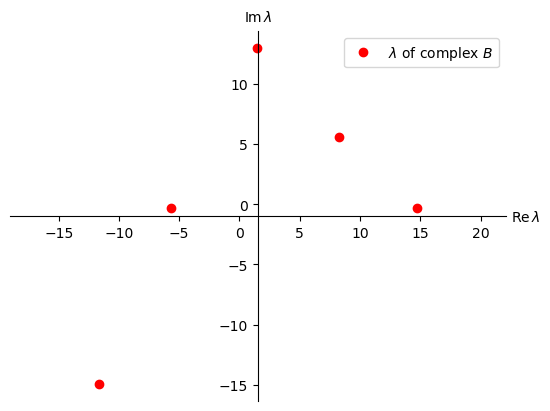

PyObject <matplotlib.legend.Legend object at 0x15fb16520>

In [8]:
λ_B = eigvals(B)

plot(real.(λ_B), imag.(λ_B), "ro", label=L"$\lambda$ of complex $B$")

reim_axes(gca())
legend()

## Complex eigenvalues and matrix powers

A complex eigenvalue $\lambda_k = |\lambda_k| e^{i\phi_k}$ in polar form.  When you multiply a vector $x$ by $A^n$, it multiplies each eigenvector component by
$$
\lambda_k^n = |\lambda_k|^n e^{in\phi_k } \, .
$$
So the **magnitude** $|\lambda_k|$ determines the exponential growth/decay of each eigenvector component, whereas any phase $\phi_k \ne 0$ causes a *phase rotation*, equivalent to an an *oscillation* with $n$.

Let's take an arbitrary real vector $x$, for example:

In [9]:
x = [1,2,3,4,5]

5-element Vector{Int64}:
 1
 2
 3
 4
 5

If we expand it in the basis of the eigenvectors ($x = Xc \implies c = X^{-1} x$):

In [10]:
c = X \ x

5-element Vector{ComplexF64}:
   3.524941723422433 - 4.592506349393967im
  3.5249417234224336 + 4.592506349393967im
    7.01850888051289 + 5.742185317061215e-17im
 -0.7740338338111896 - 0.34390253168210033im
  -0.774033833811189 + 0.3439025316820996im

we find that the coefficients come in **complex-conjugate pairs** as well.   This way, the complex-conjugate eigenvectors in the basis add up in conjugate pairs, to give a real $x$.

Now, let's plot the components of $A^n x$ as a function of $n$:

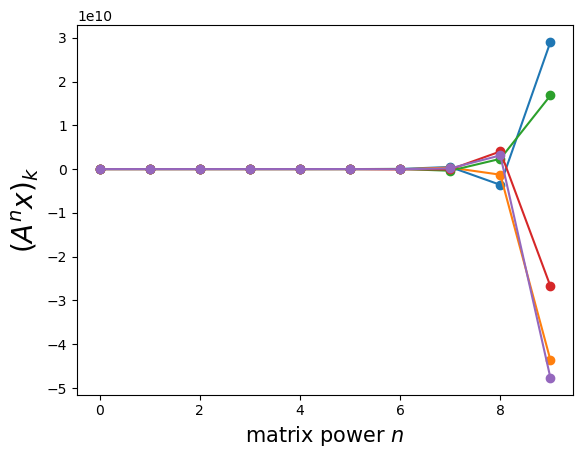

PyObject Text(0.5, 34.0, 'matrix power $n$')

In [11]:
xn = reduce(vcat, [(A^n * float(x))' for n = 1:10])

plot(xn, "o-")
ylabel(L"(A^n x)_k", size=20)
xlabel(L"matrix power $n$", size=15)

We can't see much, because there are eigenvalues with $|\lambda| > 1$, so the result blows up exponentially:

In [12]:
abs.(λ)

5-element Vector{Float64}:
 9.848307006693481
 9.848307006693481
 7.593939120984211
 9.873683114998084
 9.873683114998084

It's almost a tie, but the last eigenvalue has the biggest magnitude $\approx 9.87$ … or actually the last two complex eigenvalues, since complex conjugates have the same magnitude.

The combination of these two complex-conjugate terms leads to an oscillation, which we can see more clearly if we divide by $|\lambda_5|^n$ to cancel the exponential growth:

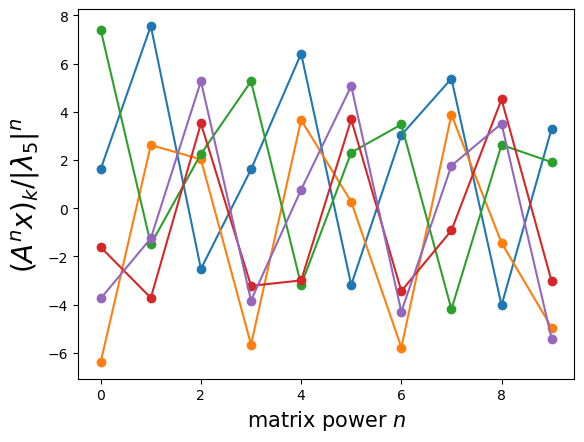

PyObject Text(0.5, 34.0, 'matrix power $n$')

In [13]:
plot(xn ./ abs(λ[end]).^(1:10), "o-")
ylabel(L"(A^n x)_k / |\lambda_5|^n", size=20)
xlabel(L"matrix power $n$", size=15)

We can plot a few more $n$ just to see that the oscillation never stops:

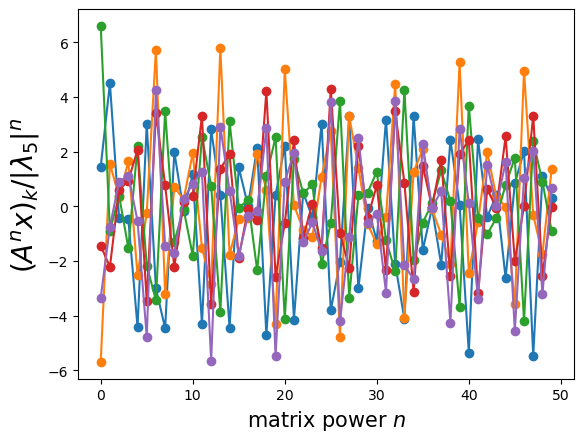

PyObject Text(0.5, 34.0, 'matrix power $n$')

In [14]:
xnmore = reduce(vcat, [((A/λ[end])^n * float(x))' for n = 1:50])
plot(xnmore, "o-")
ylabel(L"(A^n x)_k / |\lambda_5|^n", size=20)
xlabel(L"matrix power $n$", size=15)